In [7]:
!pip install pandas

  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Dense
from tensorflow.keras import Model

2025-09-18 10:29:44.270337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 10:29:44.271083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-18 10:29:44.420919: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-18 10:29:50.076546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
def cria_modelo_com_sequencial_api():
    seq_model = Sequential([Flatten(input_shape=(28, 28)),
                            Dense(128, activation=tf.nn.relu),
                            Dense(10, activation='softmax')
                          ])

    return seq_model

In [3]:
def cria_modelo_com_functional_api():
    input_layer   = Input(shape=(28, 28))

    # empilha as camadas usando: new_layer()(previous_layer)
    flatten_layer = Flatten()(input_layer)
    first_dense   = Dense(128, activation='relu')(flatten_layer)
    output_layer  = Dense(10, activation='softmax')(first_dense)

    # declara inputs e outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)

    return func_model

/home/c-specp25-2/ra290192/Documents/mo809_new/mo809/.venv/lib64/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-18 10:29:52.847599: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


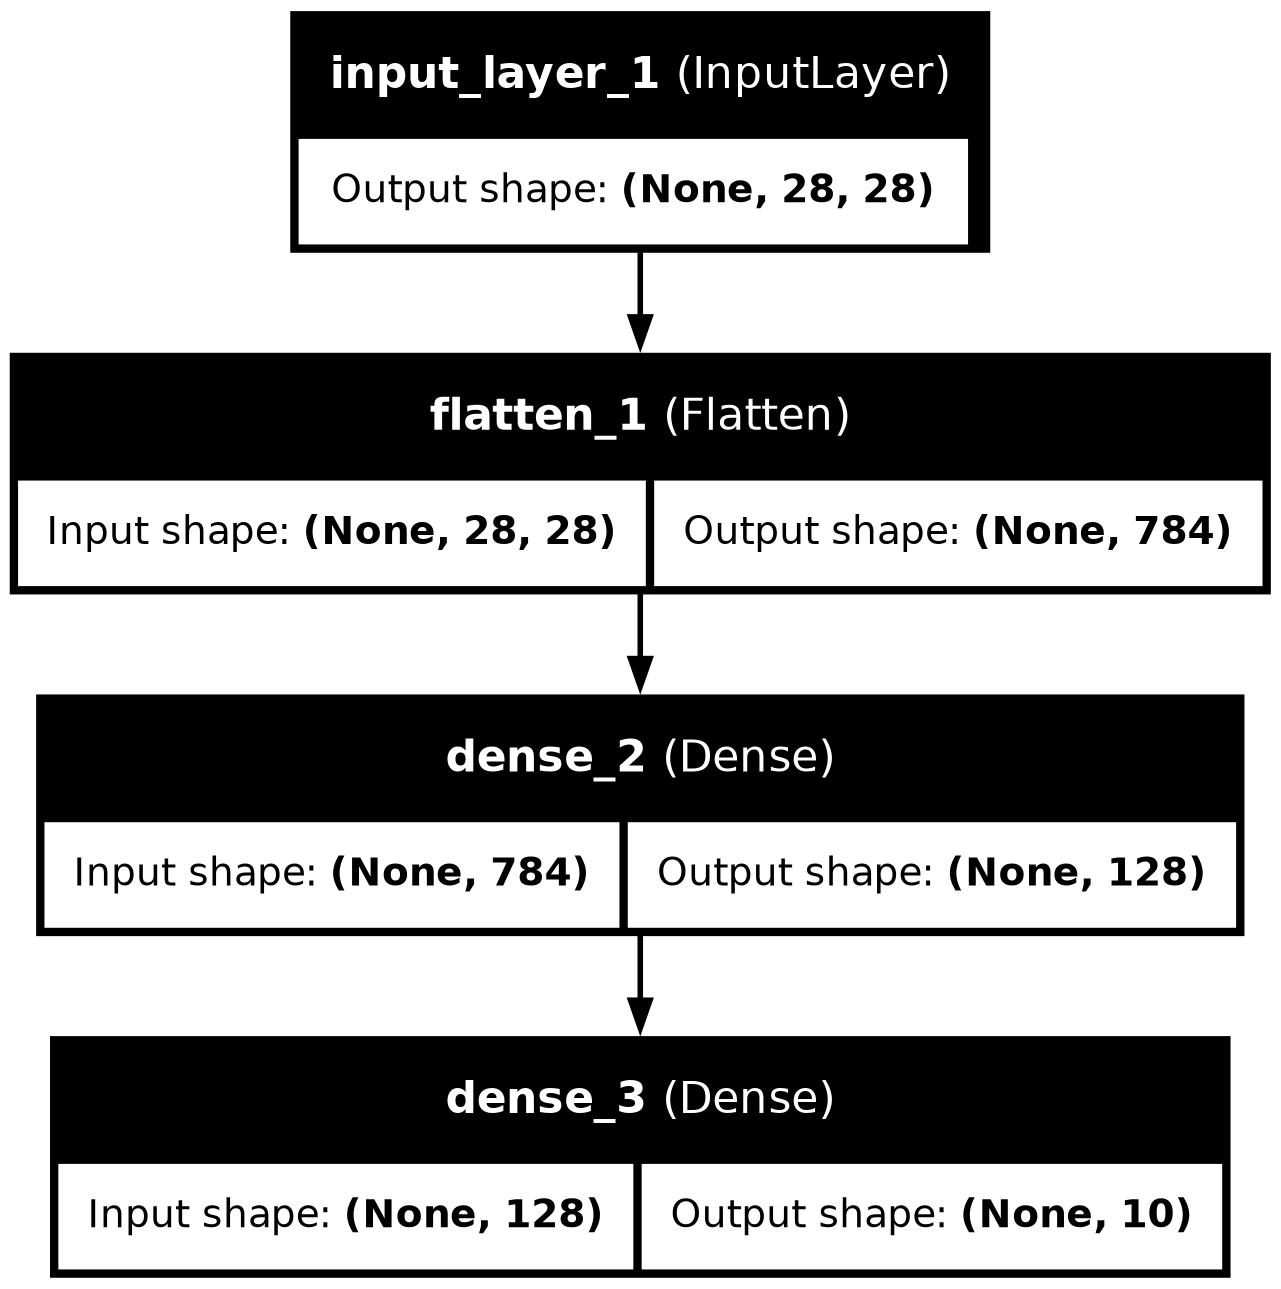

In [4]:
import pydot

m1 = cria_modelo_com_sequencial_api()
m2 = cria_modelo_com_functional_api()

tf.keras.utils.plot_model(m1, show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(m2, show_shapes=True, show_layer_names=True)

In [5]:
#carrega dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#normaliza dados
training_images = training_images / 255.0
test_images     = test_images / 255.0

#configura modelo
modelo = cria_modelo_com_functional_api()
modelo.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#treina modelo
history = modelo.fit(training_images, training_labels, epochs=20)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8245 - loss: 0.5021
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8647 - loss: 0.3777
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8765 - loss: 0.3381
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8833 - loss: 0.3161
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8907 - loss: 0.2941
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8958 - loss: 0.2806
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9005 - loss: 0.2695
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9043 - loss: 0.2580
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9075 - loss: 0.2471
Epoch 10/20

In [8]:
import pandas as pd

data_url_red   = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carregar o dataset
data_red             = pd.read_csv(data_url_red, delimiter=';')
data_red['classe']   = 1 
data_white           = pd.read_csv(data_url_white, delimiter=';')
data_white['classe'] = 0
data                 = pd.concat([data_red, data_white])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as entradas e saídas
y     = data['quality']
y_bin = data['classe']

X = data.drop(columns=['quality', 'classe'])


# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(X, y, y_bin, test_size=0.2, random_state=42)

# Normalizar os dados
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [11]:
def cria_modelo_multiplas_saidas():
    entrada = Input(shape=(11, ))

    dense_1 = Dense(128, activation='relu')(entrada)
    dense_2 = Dense(64, activation='relu')(dense_1)

    saida_1 = Dense(1, name='qualidade')(dense_2)

    dense_3 = Dense(64, activation='relu')(dense_2)
    saida_2 = Dense(1, activation='sigmoid', name='classe')(dense_3)

    modelo_2_saidas = Model(inputs=entrada, outputs=[saida_1, saida_2])

    return modelo_2_saidas

In [26]:
modelo.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │      1,536 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      4,160 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ qualidade (Dense)   │ (None, 1)         │         65 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classe (Dense)      │ (None, 1)         │         65 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,082 (55.01 KB)

 Trainable params: 14,082 (55.01 KB)

 Non-trainable params: 0 (0.00 B)

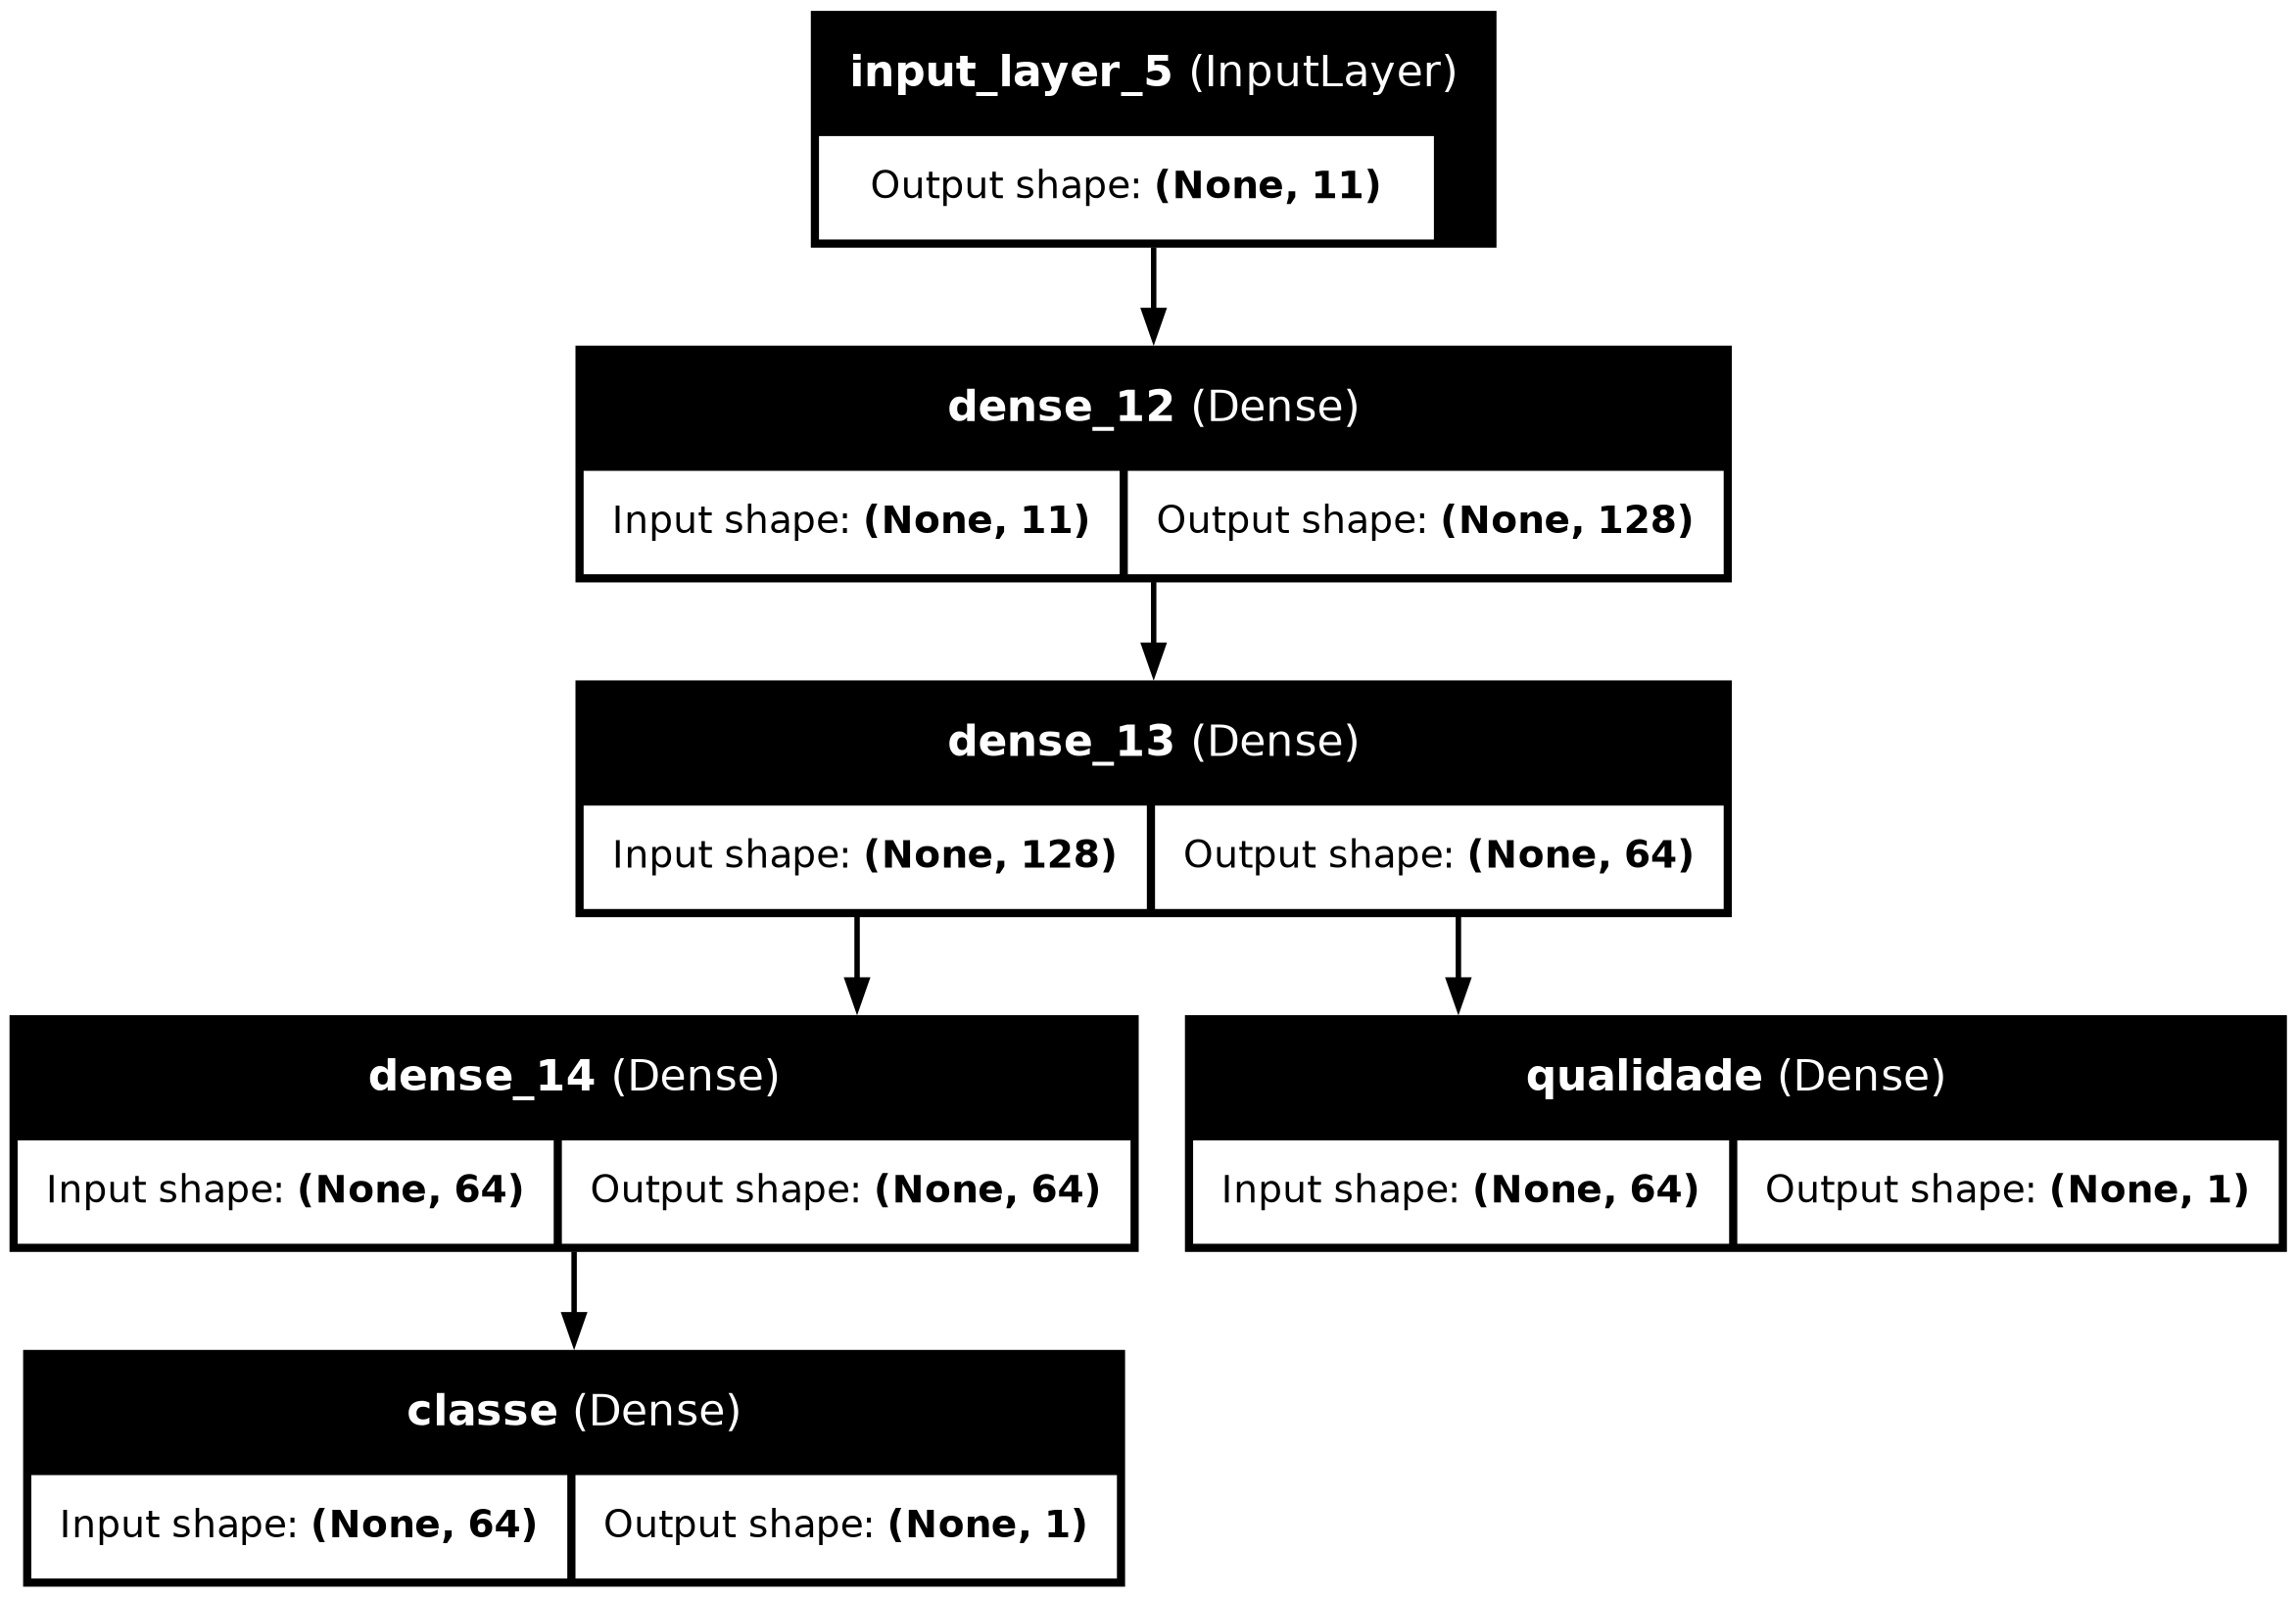

In [27]:
tf.keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True)

In [28]:
modelo.compile(
    optimizer='adam',
    loss={
        'qualidade': 'mse',
        'classe': 'binary_crossentropy'
    },
    metrics={
        'qualidade': 'mae',
        'classe': 'accuracy'
    }
)

In [29]:
history = modelo.fit(
    X_train, {'qualidade': y_train, 'classe': y_bin_train},
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - classe_accuracy: 0.9891 - classe_loss: 0.0600 - loss: 1.7757 - qualidade_loss: 1.7157 - qualidade_mae: 1.0081 - val_classe_accuracy: 0.9981 - val_classe_loss: 0.0367 - val_loss: 1.1066 - val_qualidade_loss: 1.0744 - val_qualidade_mae: 0.8137
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - classe_accuracy: 0.9944 - classe_loss: 0.0300 - loss: 0.9850 - qualidade_loss: 0.9496 - qualidade_mae: 0.7586 - val_classe_accuracy: 0.9981 - val_classe_loss: 0.0329 - val_loss: 0.7122 - val_qualidade_loss: 0.6801 - val_qualidade_mae: 0.6430
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - classe_accuracy: 0.9949 - classe_loss: 0.0236 - loss: 0.6837 - qualidade_loss: 0.6611 - qualidade_mae: 0.6330 - val_classe_accuracy: 0.9981 - val_classe_loss: 0.0298 - val_loss: 0.5777 - val_qualidade_loss: 0.5504 - val_qualidade_mae: 0.5607
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - classe_accuracy: 0.9966 - classe_loss: 0.0205 - loss: 0.5779 - quali

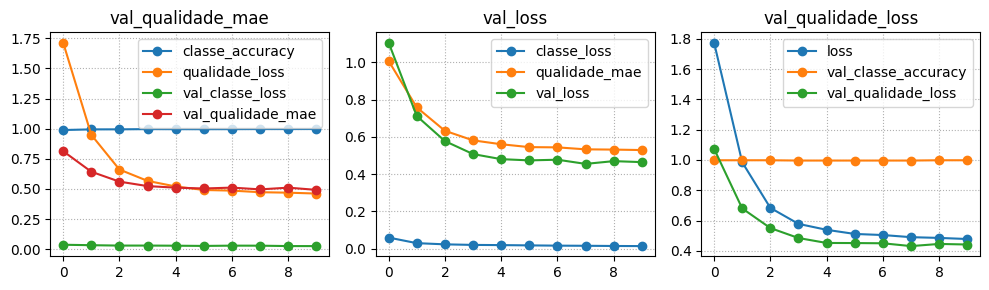

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

for idx, chave in enumerate(history.history.keys()):
    axs[idx%3].plot(history.history[chave], label=chave, marker='o')
    axs[idx%3].set_title(chave)
    axs[idx%3].grid(True, linestyle=':')
    axs[idx%3].legend()

plt.tight_layout()
plt.show()

In [31]:
def calcula_loss(model, X, y_quality, y_class):
    mse_loss = tf.keras.losses.MeanSquaredError()
    binary_crossentropy_loss = tf.keras.losses.BinaryCrossentropy()

    predictions    = modelo(X)

    qualidade_loss = mse_loss(y_quality, predictions[0])
    classe_loss    = binary_crossentropy_loss(y_class, predictions[1])
    total_loss     = qualidade_loss + classe_loss

    return total_loss

In [32]:
def treina_modelo(modelo, X, y_qualidade, y_classe, optimizer, train_mae, train_accuracy):
    with tf.GradientTape() as tape:
        loss = calcula_loss(modelo, X, y_qualidade, y_classe)

    # Calcular os gradientes
    gradients = tape.gradient(loss, modelo.trainable_variables)

    # Atualizar os pesos
    optimizer.apply_gradients(zip(gradients, modelo.trainable_variables))

    #predict
    predictions = modelo.predict(X, verbose=0)

    train_mae.update_state(y_qualidade, predictions[0])
    train_accuracy.update_state(y_classe, predictions[1])

    return loss

In [33]:
modelo         = cria_modelo_multiplas_saidas()
optimizer      = tf.keras.optimizers.Adam()
train_mae      = tf.keras.metrics.MeanAbsoluteError()
train_accuracy = tf.keras.metrics.BinaryAccuracy()

losses, accs, maes = [], [], []

epochs = 40
for epoch in range(epochs):
    train_mae.reset_state()
    train_accuracy.reset_state()

    loss = treina_modelo(modelo, X_train, y_train, y_bin_train, optimizer, train_mae, train_accuracy)
    losses.append(loss.numpy())
    accs.append(train_accuracy.result().numpy())
    maes.append(train_mae.result().numpy())
    # if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.numpy()}, MAE {train_mae.result().numpy()}, Accuracy {train_accuracy.result().numpy()}")

Epoch 0, Loss: 32.04301071166992, MAE 5.354538440704346, Accuracy 0.5316528677940369
Epoch 1, Loss: 30.473779678344727, MAE 5.208235263824463, Accuracy 0.577833354473114
Epoch 2, Loss: 28.958662033081055, MAE 5.062469005584717, Accuracy 0.6270925402641296
Epoch 3, Loss: 27.495811462402344, MAE 4.916781425476074, Accuracy 0.6771214008331299
Epoch 4, Loss: 26.080881118774414, MAE 4.77140474319458, Accuracy 0.729459285736084
Epoch 5, Loss: 24.71299171447754, MAE 4.6257123947143555, Accuracy 0.7706369161605835
Epoch 6, Loss: 23.38677215576172, MAE 4.4801554679870605, Accuracy 0.7991148829460144
Epoch 7, Loss: 22.101743698120117, MAE 4.333845138549805, Accuracy 0.8320184946060181
Epoch 8, Loss: 20.85434913635254, MAE 4.186893939971924, Accuracy 0.8562632203102112
Epoch 9, Loss: 19.643064498901367, MAE 4.038792133331299, Accuracy 0.8758899569511414
Epoch 10, Loss: 18.466106414794922, MAE 3.889185905456543, Accuracy 0.8814700841903687
Epoch 11, Loss: 17.323698043823242, MAE 3.73893404006958, 

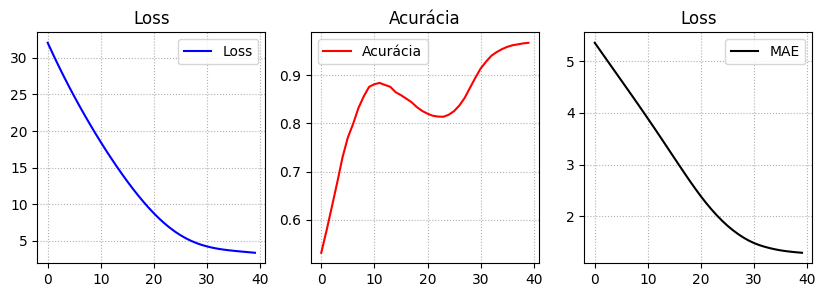

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

axs[0].plot(losses, label='Loss', color='b')
axs[0].set_title('Loss')

axs[1].plot(accs, label='Acurácia', color='r')
axs[1].set_title('Acurácia')

axs[2].plot(maes, label='MAE', color='k')
axs[2].set_title('Loss')


for i in range(3):
  axs[i].grid(True, linestyle=':')
  axs[i].legend()